In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import os 

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [133]:
def calculate_mean(df,column_name):
   return df[column_name].mean()

def replace_mis_val_mean(df,column_name):
    mean_val = calculate_mean(df,column_name)
    df.loc[df[column_name].isna(),column_name] = mean_val
    return df 
    


    
def mis_replace_linear_regression(df,X_col=["minPrice"],Y_col="modalPrice"):
    #Missing value Treatment 
    #Method 2 : using function approximation. 
    # Y_col = "modalPrice"
    # X_col = ["minPrice"]
    ################################################################
    df_yes_na = df[df[Y_col].isna()]
    if(len(df_yes_na) == 0):
        print("Nothing to predict, no null values!!!!")
        return df
    
    ################################################################
    # One without no null values in modalprice 
    #Filtering data 
    df_not_na = df[df[Y_col].notna()]
    for x_col_name in X_col:
        df_not_na = df_not_na[df_not_na[x_col_name].notna()]
    # Defining a linear model for mapping x = ["minPrice"], y = "modalPrice"
    X = np.array(np.matrix(df_not_na[X_col]))
    Y = np.array(np.matrix(df_not_na[Y_col]).T) 
    #print(X)
    try: 
        lin_reg   = LinearRegression()
        lin_model = lin_reg.fit(X,Y)
    except:
        print("The Linear regression model didn't run!!!!. Problem with the data. ")
    ################################################################
    ##Replacing the predicted values!!!!....
    X_test    = np.array(np.matrix(df_yes_na[X_col]))
    Y_test    = lin_model.predict(X_test)
    list_index_mis_values = list(df_yes_na.index)
    df.loc[list_index_mis_values,Y_col] = Y_test
    ################################################################
    
    ##testing if null values are replaces using linear regression method. 
    try:
        assert len(df[df[Y_col].isna()])== 0
    except:
        print("The null values are not replaced correctly!!!. Don't execute next code.")
    
    ################################################################
    
    return df





def handle_outlier(df,col_name,val_replace):
    # Outlier Handling. 
    # Going to detect outlier based on standard deviation. if the data point is mean + (3* Std) --> Then classify as outlier
    # treat the point as mean
    #col_name = "mis_m2_minprice"
    mean = df[col_name].mean()
    std  = df[col_name].std()
    out_pos = mean + (3 * std)
    out_neg = mean - (3 * std)
    cond = (df[col_name] > out_pos) | (df[col_name] < out_neg)
    
    #val_replace = mean
    if(len(df[cond])==0):
        print("No outliers to Handle!!!!!!!")
        return df
    else:
        df.loc[cond,col_name] = val_replace
        return df 
    
    


def plot_time_series_data(df,filepath,time_col="timestamp",data_col="min_price",title="Plot showing Min Price Vs Timestamp",plot_show=True,hard_save=False):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    font_axis = {'family': 'serif',
            'color':  'darkred',
            'weight': 'bold',
            'size': 30,
            }


    plt.plot(df[time_col],df[data_col])
    plt.xlabel(time_col,fontdict = font )
    plt.ylabel(data_col,fontdict=font)
    plt.title(title,fontdict=font)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    

        
    if(os.path.exists(file_path) & (not hard_save)):
        print("Figure already saved!!!!")
    else:
        print("Saving Figure!!!!")
        plt.savefig(file_path)
        
    
    if plot_show:
        plt.show()

        
def plotting_multiple_series(df,filepath,data_col_list,time_col="timestamp",title="Plot showing Min Price Vs Timestamp",plot_show=True,hard_save=False):

    fig = plt.gcf()
    fig.set_size_inches(16.5, 6.5)

    font_axis = {'family': 'serif',
            'color':  'darkred',
            'weight': 'bold',
            'size': 30,
            }


    y_data_col = "Moving Averages"

    for data_col in data_col_list:
        #print(data_col)
        plt.plot(df[time_col],df[data_col])


    plt.xlabel(time_col,fontdict = font )
    plt.ylabel(y_data_col,fontdict=font)
    plt.title(title,fontdict=font)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.legend(data_col_list, loc='upper left')


    if(os.path.exists(filepath) & (not hard_save)):
        print("Figure already saved!!!!")
    else:
        print("Saving Figure!!!!")
        plt.savefig(filepath)


    if plot_show:
        plt.show()



def find_moving_averages(df,col_name_prefix,window_list,generate_col_fun):
    data_col_list = []
    for window_size in window_size_list:
        new_col_name = generate_col(col_name_prefix,window_size)
        data_col_list+=[new_col_name]
        df[new_col_name]= df[col_name].rolling(window=window_size).mean()
    
    return df,data_col_list

In [3]:
df = pd.read_csv("azd.csv")

In [4]:
#df.head()

In [5]:
#Filtering the data. 
df=df[['priceDate','arrivals','minPrice','maxPrice','modalPrice']] 

In [6]:
df["mis_m1_minprice"]    = df["minPrice"]
df["mis_m1_maxprice"]    = df["maxPrice"]
df["mis_m1_modalprice"]  = df["modalPrice"]
####
df["mis_m2_minprice"]    = df["minPrice"]
df["mis_m2_maxprice"]    = df["maxPrice"]
df["mis_m2_modalprice"]  = df["modalPrice"]
####

In [7]:
#Writing Descriptive analysis. 
file_path ="csv_output/descriptive_analysis.csv"
if os.path.exists(file_path):
    print("File already written!!!.....")
else:
    df.describe().to_csv(file_path)

File already written!!!.....


In [8]:
# Missing Value Treatment
#Method 1 : Using mean to substitute missing values. 
col_name = "mis_m1_minprice"
df = replace_mis_val_mean(df,col_name)

col_name = "mis_m1_maxprice"
df = replace_mis_val_mean(df,col_name)


col_name = "mis_m1_modalprice"
df = replace_mis_val_mean(df,col_name)




In [9]:
# Missing Value Treatment
#Method 2 : Using Linear Regression for filling missing values 
col_name = "mis_m2_minprice"
df = mis_replace_linear_regression(df,X_col= ["maxPrice","modalPrice"],Y_col=col_name)

col_name = "mis_m2_maxprice"
df = mis_replace_linear_regression(df,X_col=["minPrice"] ,Y_col=col_name)


col_name = "mis_m2_modalprice"
df = mis_replace_linear_regression(df,X_col=["minPrice"] ,Y_col=col_name)


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [17]:
# Outlier handling
col_name ="mis_m2_minprice"
df = handle_outlier(df,col_name,df[col_name].mean())

col_name = "mis_m2_maxprice"
df = handle_outlier(df,col_name,df[col_name].mean())

col_name = "mis_m2_modalprice"
df = handle_outlier(df,col_name,df[col_name].mean())

In [11]:
df_new = df.copy()

In [12]:
df_ts =df_new[["priceDate","mis_m2_minprice","mis_m2_maxprice","mis_m2_modalprice"]]

In [13]:
df_ts.columns = ["timestamp","min_price","max_price","modal_price"]

In [23]:
df_ts["timestamp"]= pd.to_datetime(df_ts["timestamp"])

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Saving Figure!!!!


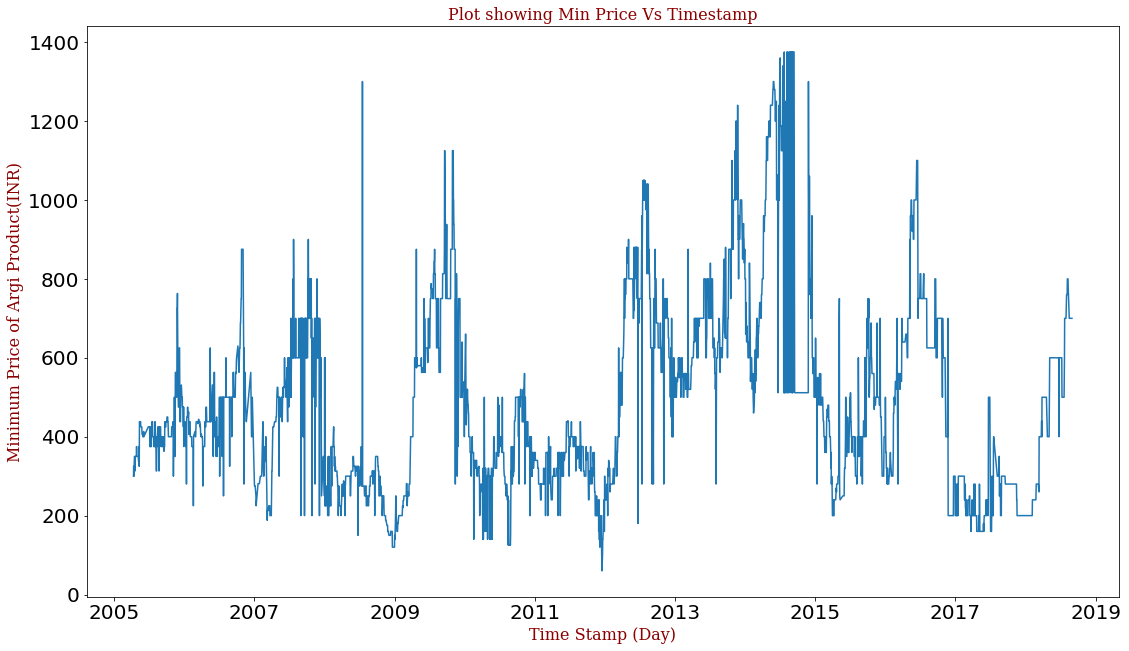

Saving Figure!!!!


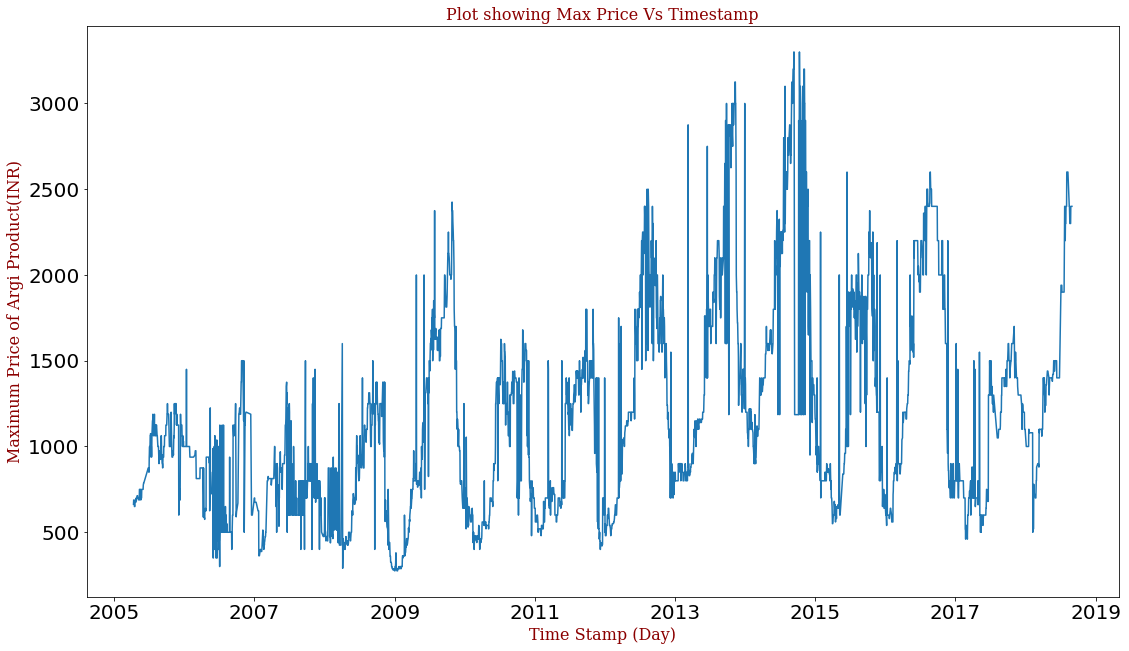

Saving Figure!!!!


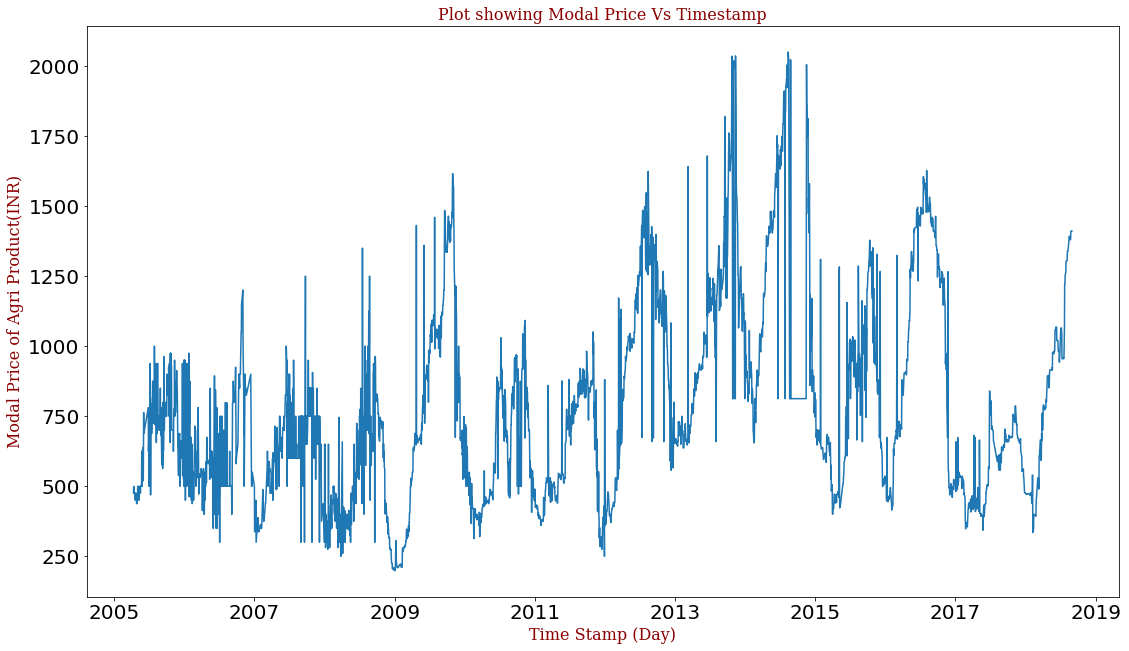

In [72]:
####
df_plot_series = df_ts.copy()
time_col = "Time Stamp (Day)"
min_col  = "Minimum Price of Argi Product(INR)"
max_col  = "Maximum Price of Argi Product(INR)"
mod_col  = "Modal Price of Agri Product(INR)"
df_plot_series.columns = [time_col,min_col,max_col,mod_col]
#######


title = "Plot showing Min Price Vs Timestamp"
file_path = "plots/Actual_minprice_all.png"
plot_time_series_data(df_plot_series,file_path,time_col=time_col,data_col=min_col,title=title,hard_save=True)


title = "Plot showing Max Price Vs Timestamp"
file_path = "plots/Actual_maxprice_all.png"
plot_time_series_data(df_plot_series,file_path,time_col=time_col,data_col=max_col,title=title,hard_save=True)

title = "Plot showing Modal Price Vs Timestamp"
file_path = "plots/Actual_modprice_all.png"
plot_time_series_data(df_plot_series,file_path,time_col=time_col,data_col=mod_col,title=title,hard_save=True)







In [74]:
df_ts.head()

,timestamp,min_price,max_price,modal_price
0,2005-04-11,300.0,663.0,475.0
1,2005-04-12,325.0,688.0,500.0
2,2005-04-13,300.0,688.0,488.0
3,2005-04-16,350.0,650.0,475.0
4,2005-04-18,350.0,650.0,475.0


In [150]:
df_ts_m= df_ts.copy()

col_name_min = "min_price"
col_name_prefix_min = "Minprice"
##
col_name_max = "max_price"
col_name_prefix_max = "Maxprice"
##
col_name_mod = "mod_price"
col_name_prefix_mod = "Modprice"
##
window_size_list = [3,5,10,20,30,50,300]
data_col_list    = []
##

col_function = lambda x,y : x +"_"+"m_avg_"+str(y)
col_function_bus = lambda x,y : x +" "+"Moving Average Window - "+str(y)

generate_col = col_function_bus


df_ts_m,data_col_list_min=find_moving_averages(df_ts_m,col_name_prefix_min,window_size_list,generate_col)
df_ts_m,data_col_list_max=find_moving_averages(df_ts_m,col_name_prefix_max,window_size_list,generate_col)
df_ts_m,data_col_list_mod=find_moving_averages(df_ts_m,col_name_prefix_mod,window_size_list,generate_col)




In [152]:
df_ts_m.head()

,timestamp,min_price,max_price,modal_price,Minprice Moving Average Window - 3,Minprice Moving Average Window - 5,Minprice Moving Average Window - 10,Minprice Moving Average Window - 20,Minprice Moving Average Window - 30,Minprice Moving Average Window - 50,...,Maxprice Moving Average Window - 30,Maxprice Moving Average Window - 50,Maxprice Moving Average Window - 300,Modprice Moving Average Window - 3,Modprice Moving Average Window - 5,Modprice Moving Average Window - 10,Modprice Moving Average Window - 20,Modprice Moving Average Window - 30,Modprice Moving Average Window - 50,Modprice Moving Average Window - 300
0,2005-04-11,300.0,663.0,475.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-04-12,325.0,688.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-04-13,300.0,688.0,488.0,308.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,308.333333,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-16,350.0,650.0,475.0,325.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,325.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-04-18,350.0,650.0,475.0,333.333333,325.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,333.333333,325.0,NaN,NaN,NaN,NaN,NaN


Saving Figure!!!!


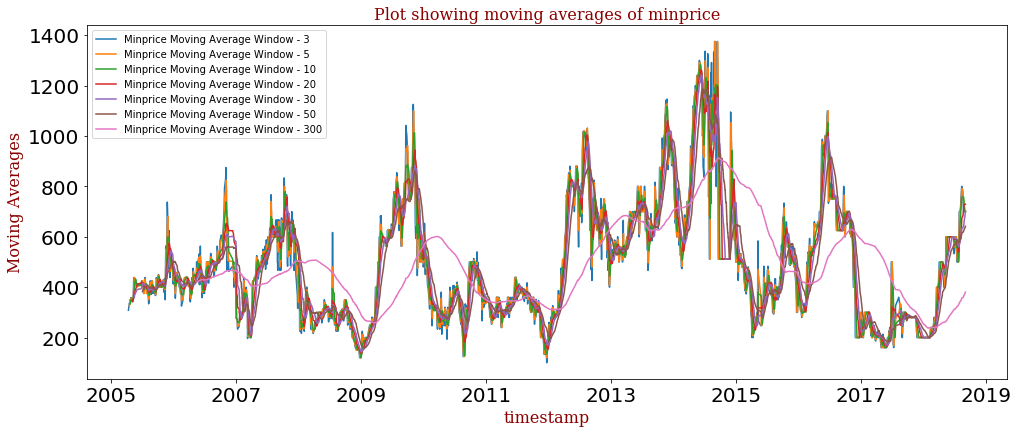

Saving Figure!!!!


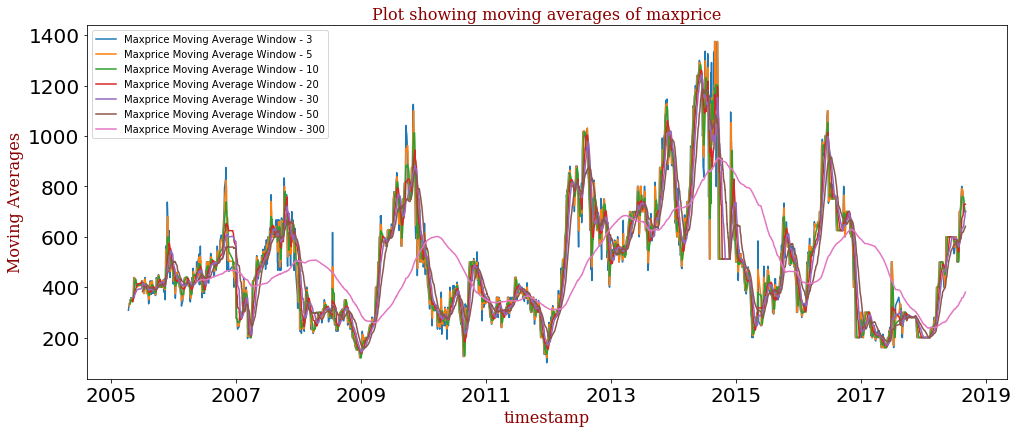

Saving Figure!!!!


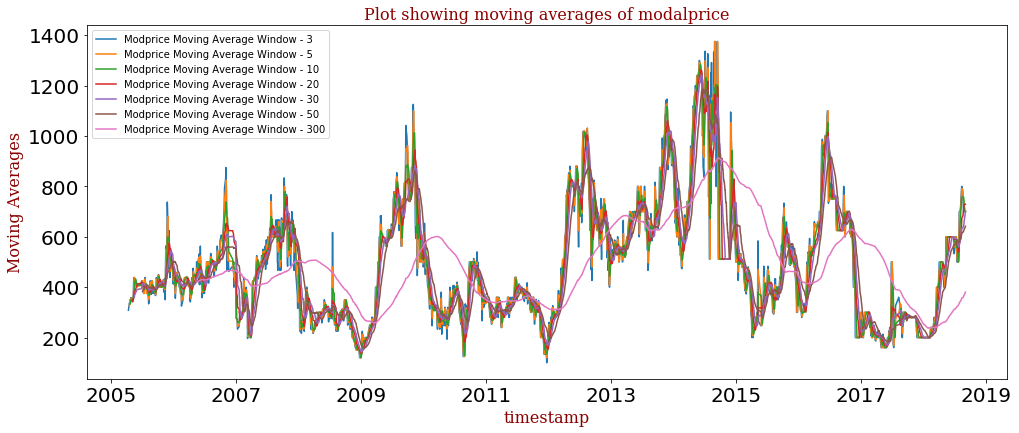

In [157]:

title = "Plot showing moving averages of minprice"
file_path = "plots/min_moving_averages_3_5_10.png"
x_col  = "timestamp"
plotting_multiple_series(df_ts_m,file_path,data_col_list_min,x_col,title=title,hard_save=True)


title = "Plot showing moving averages of maxprice"
file_path = "plots/max_moving_averages.png"
plotting_multiple_series(df_ts_m,file_path,data_col_list_max,x_col,title=title,hard_save=True)

title = "Plot showing moving averages of modalprice"
file_path = "plots/modal_moving_averages.png"
plotting_multiple_series(df_ts_m,file_path,data_col_list_mod,x_col,title=title,hard_save=True)





In [91]:
df_ts_m.head()

,timestamp,min_price,max_price,modal_price,min_m_avg_3,min_m_avg_5,min_m_avg_10,min_m_avg_20,min_m_avg_30,min_m_avg_50
0,2005-04-11,300.0,663.0,475.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-04-12,325.0,688.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-04-13,300.0,688.0,488.0,308.333333,NaN,NaN,NaN,NaN,NaN
3,2005-04-16,350.0,650.0,475.0,325.000000,NaN,NaN,NaN,NaN,NaN
4,2005-04-18,350.0,650.0,475.0,333.333333,325.0,NaN,NaN,NaN,NaN


In [ ]:
df.priceDate = pd.to_datetime(df.priceDate) #conveting the date column as index

In [ ]:
df.set_index('priceDate', inplace=True)

In [ ]:
df.plot()
plt.show()

In [ ]:
df.plot(use_index=True,y='minPrice')

In [ ]:
#mean = numpy.mean(elements, axis=0)
#sd = numpy.std(elements, axis=0)
#df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
#def remove_outlier(df, col_name):
 #   q1 = df[col_name].quantile(0.25)
 #   q3 = df[col_name].quantile(0.75)
  #  iqr = q3-q1 #Interquartile range
   # fence_low  = q1-1.5*iqr
    #fence_high = q3+1.5*iqr
    #df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    #return df_out
#final_list = [x for x in df['maxPrice'] if (x > mean - 2 * sd)]
#final_list = [x for x in final_list if (x < mean + 2 * sd)]

In [ ]:
# remove_outlier(df,'maxPrice')
# remove_outlier(df,'modalPrice')
# remove_outlier(df,'minPrice')

In [ ]:
df.describe()

In [ ]:
df.plot(use_index=True,y='modalPrice')

In [ ]:
df.plot(use_index=True,y='maxPrice')

In [ ]:
df.plot(use_index=True,y='modalPrice')

In [ ]:
#rolmean=df.rolling(window=3).mean()
def add_mean_std_cols(df,col_name,t):
    res = df[col_name].rolling(t).agg(['mean'])
    #res.columns = res.columns.map('_'.join)
    #cols = np.concatenate(list(zip(df.columns, res.columns[0::2], res.columns[1::2])))
    #final = res.join(df).loc[:, cols]
    return res


#for i in range(2,10):
#   df['MA{}'.format(i)] = df.rolling(window=i).mean()


In [ ]:
n_df_min=add_mean_std_cols(df,["minPrice"],3)
n_df_max=add_mean_std_cols(df,["maxPrice"],3)
n_df_mode=add_mean_std_cols(df,["modalPrice"],3)

In [ ]:
#original=plt.plot(df,color='gray',label='original')
mean=plt.plot(n_df_min,label='mean')

In [ ]:
#original=plt.plot(df,color='gray',label='original')
mean_max=plt.plot(n_df_max,label='mean')

In [ ]:
#original=plt.plot(df,color='gray',label='original')
mean_modal=plt.plot(n_df_mode,label='mean')

In [ ]:
from 